In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

> How to handle time series data with ease?

In [9]:
# reading file
air_quality = pd.read_csv("data/air_quality_no2_long.csv")

# renaming column
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [10]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

##### Using pandas datetime properties

In [11]:
# I want to work with the dates in the column datetime as datetime objects instead of plain text
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality.datetime

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

Initially, the values in `datetime` are character strings and do not provide any datetime operations (e.g. extract the year, day of the week,…). By applying the `to_datetime` function, pandas interprets the strings and convert these to datetime (i.e. `datetime64[ns, UTC]`) objects. In pandas we call these datetime objects similar to `datetime.datetime` from the standard library as `pandas.Timestamp.`

#### Note
As many data sets do contain datetime information in one of the columns, pandas input function like `pandas.read_csv()` and `pandas.read_json()` can do the transformation to dates when reading the data using the `parse_dates` parameter with a list of the columns to read as Timestamp:

* pd.read_csv("../data/air_quality_no2_long.csv", parse_dates=["datetime"]) 

In [12]:
# What is the start and end date of the time series data set we are working with?
air_quality["datetime"].min(), air_quality["datetime"].max()

# *This illustrates the usefulness of pandas.Timestamp objects

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

Using `pandas.Timestamp` for datetimes enables us to calculate with date information and make them comparable.

Hence, we can use this to get the length of our time series:

In [13]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

The result is a `pandas.Timedelta object`, similar to `datetime.timedelta` from the standard Python library and defining a time duration.

In [14]:
# I want to add a new column to the DataFrame containing only the month of the measurement
air_quality["month"] = air_quality["datetime"].dt.month
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


#### Note
By using `Timestamp` objects for dates, a lot of time-related properties are provided by pandas. For example the `month`, but also `year`, `weekofyear`, `quarter` etc All of these properties are accessible by the `dt` accessor. You don't need to import datetime, to use the `dt` accessor



In [15]:
# What is the average NO2 concentration for each day of the week for each of the measurement locations?
air_quality[["datetime", "location", "value"]].groupby([air_quality["datetime"].dt.weekday, "location"]).mean()

# 2nd Method - air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

value
datetime location                     
0        BETR801             27.875000
         FR04014             24.856250
         London Westminster  23.969697
1        BETR801             22.214286
         FR04014             30.999359
         London Westminster  24.885714
2        BETR801             21.125000
         FR04014             29.165753
         London Westminster  23.460432
3        BETR801             27.500000
         FR04014             28.600690
         London Westminster  24.780142
4        BETR801             28.400000
         FR04014             31.617986
         London Westminster  26.446809
5        BETR801             33.500000
         FR04014             25.266154
         London Westminster  24.977612
6        BETR801             21.896552
         FR04014             23.274306
         London Westminster  24.859155

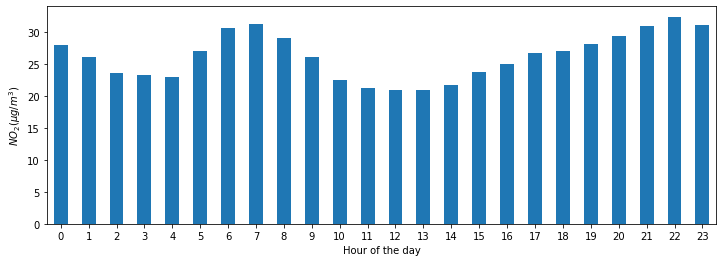

In [16]:
""" Plot the typical NO2 pattern during the day of our time series of all stations together. 
    In other words, what is the average value for each hour of the day? """

fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind='bar', rot=0, ax=axs)

# custom x and y label using matplotlib
plt.xlabel("Hour of the day");  
plt.ylabel("$NO_2 (µg/m^3)$");

##### Datetime as index

In [17]:
# setting datetime as index via pivot function, this can also be done using set_index function
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


Working with a datetime index (i.e. `DatetimeIndex`) provides powerful functionalities. For example, we do not
need the `dt` accessor to get the time series properties, but have these properties available on the index directly:

In [18]:
no_2.index.year, no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033))

Some other advantages are the convenient subsetting of time period or the adapted time scale on plots. Let’s apply this on our data.

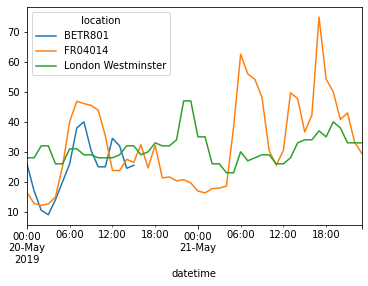

In [19]:
# Create a plot of the NO2 values in the different stations from the 20th of May till the end of 21st of May
no_2["2019-05-20":"2019-05-21"].plot();

# *By providing a string that parses to a datetime, a specific subset of the data can be selected on a DatetimeIndex.

##### Resample a time series to another frequency

In [20]:
# Aggregate the current hourly time series values to the monthly maximum value in each of the stations.
monthly_max = no_2.resample("M").max()

monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


A very powerful method on time series data with a datetime index, is the ability to `resample()` time series to another frequency (e.g., converting secondly data into 5-minutely data).

The `resample()` method is similar to a groupby operation:
* it provides a time-based grouping, by using a string (e.g. `M`, `5H`, `T`, `5h20min`, `D`, `W`…) that defines the target frequency
* it requires an aggregation function such as `mean`, `max`,…

In [21]:
# When defined, the frequency of the time series is provided by the freq attribute:
monthly_max.index.freq

<MonthEnd>

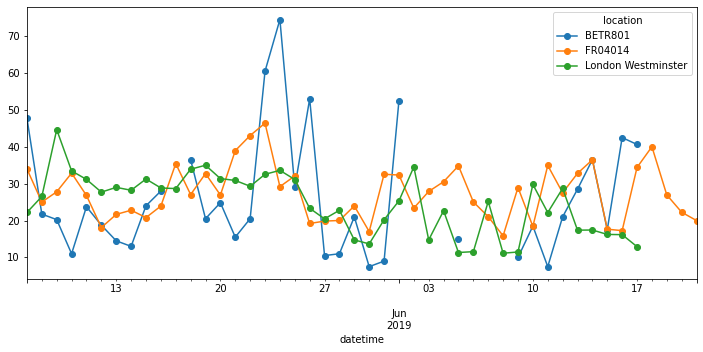

In [25]:
# Make a plot of the daily mean NO2 value in each of the stations.
no_2.resample("D").mean().plot(style="-o", figsize=(12, 5));

> How to manipulate textual data?

In [26]:
titanic = pd.read_csv("data/titanic.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# Make all name characters lowercase.
titanic["Name"].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [30]:
# Task
""" Create a new column Surname that contains the 
    surname of the passengers by extracting the part before the comma. """

# splitting name str at (,) to see what happens
titanic["Name"].str.split(",")

# finally
# splitting the name str then getting the first element of the str list made after split
titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)
titanic["Surname"]

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Surname, Length: 891, dtype: object

As we are only interested in the first part representing the surname (element 0), we can again use the `str` accessor and apply `Series.str.get()` to extract the relevant part. Indeed, these string functions can be concatenated to combine multiple functions at once!

In [33]:
# Extract the passenger data about the countesses on board of the Titanic.

# conditional expression to use
titanic["Name"].str.contains("Countess")

# solution making use of conditional
titanic[titanic["Name"].str.contains("Countess")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,Rothes


#### Note
More powerful extractions on strings are supported, as the `Series.str.contains()` and `Series.str.extract()` methods accept `regular expressions`

In [42]:
# Q. Which passenger of the Titanic has the longest name?

# conditional expression to use
titanic["Name"].str.len().idxmax()

# solution making use of conditional
titanic.loc[titanic["Name"].str.len().idxmax(), "Name"]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

* First, get the longest name by using the `Series.str.len()` function
* Next, find the corresponding location, preferably the index name/label by using `idxmax()` method
* Then, based on the index name of the row (307) and the column (Name), we can do a selection using the `loc` operator

#### Replacing values in columns

In [43]:
# In the “Sex” column, replace values of “male” by “M” and values of “female” by “F”.
titanic["Sex_short"] = titanic["Sex"].replace({"male": "M", "female": "F"})

# created a new column from "sex" and replaced its values 
titanic["Sex_short"]

0      M
1      F
2      F
3      F
4      M
      ..
886    M
887    F
888    F
889    M
890    M
Name: Sex_short, Length: 891, dtype: object

Whereas `replace()` is not a string method, it provides a convenient way to use mappings or vocabularies to translate certain values. It requires a `dictionary` to define the mapping `{from : to}`.

#### Note
There's also `str.replace()` but its not for use when mapping multiple values

# C'EST FINI